# Research Questions:
1. What are the most reviewed Amazon products? : 
    >TOP 10 - VISUALIZATION  graph. 

2. What are the key topics covered by the reviews? (this would give the main keyword of the survey, which certainly will help the consumer to understand the summary of the discussion, and for the retailer, it will help to know the customer feedback in one or two words)

> LDA MODEL should answer this. (Work in Progress, Topic modelling visualization remaining.)

3. Analyze reviews in the first 90 days after a product launch? : 
(Work in Progess.)
TEXTBLOB/ TF-IDF (First 90days subset.)/CLASSIFY Positive and Ngeative comments for different time frame. 
> Extract reviews > sentiment analysis. 
> Filter out dataset using date, and do some kind of exploratory analysis for first 90days, their count and sentiment. 

4. Map the keywords in the review text against the review ratings to help train sentiment models.
> [Work in progress.]
> After categorizing into pos and neg, lets see if we can answer this question. 


# PPT

Intro - About out project and Dataset - Before balance and after balance,Sentiment mapping, Ratings Distribution - Sharmila
Data Preprocessing- Till stopwordsa removal] 

Exploratory Analysis - 
Question -1: - Prathyusha 
1. Word Cloud, Top 10 products, Total customer reviews for each product, Top 10 amzon product, top 10 customer reviews for products over time - 3 plots
2. Polarity plot and Cross tabulation plot

Question 2: Before90 and after90 compare - Haripriya
3 plots - review, avg ratings, avg polarity
T- test statistic - comparision for top 10 products

Question 3: LDA - Olivia
3 Plots - 3 products
Conclusion 



# To work 

Wordcloud - Olivia

Prathyusha - Stackedbar chart

Question with T test - Haripriya




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer

# from textblob import TextBlob
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
data2 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [4]:
data2['reviews.rating'].value_counts()

5    19897
4     5648
3     1206
1      965
2      616
Name: reviews.rating, dtype: int64

In [5]:
# df1 = df[['dateAdded' , 'name' , 'primaryCategories' , 'reviews.date','reviews.doRecommend','reviews.rating','reviews.text','reviews.title']]
# df1.head()

# df = data2[['dateAdded','name','categories','primaryCategories','reviews.date','reviews.doRecommend','reviews.rating','reviews.text']]
# df.head()

df = data2[['dateAdded','name','reviews.date','reviews.rating','reviews.text']]
df.head()

,dateAdded,name,reviews.date,reviews.rating,reviews.text
0,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2017-03-02T00:00:00.000Z,3,I order 3 of them and one of the item is bad q...
1,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2016-08-31T00:00:00.000Z,4,Bulk is always the less expensive way to go fo...
2,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2016-12-06T00:00:00.000Z,5,Well they are not Duracell but for the price i...
3,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2016-03-28T00:00:00.000Z,5,Seem to work as well as name brand batteries a...
4,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2017-04-22T00:00:00.000Z,5,These batteries are very long lasting the pric...


# There are 5 different rating and below is the distribution of rating.

/Users/olivia/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


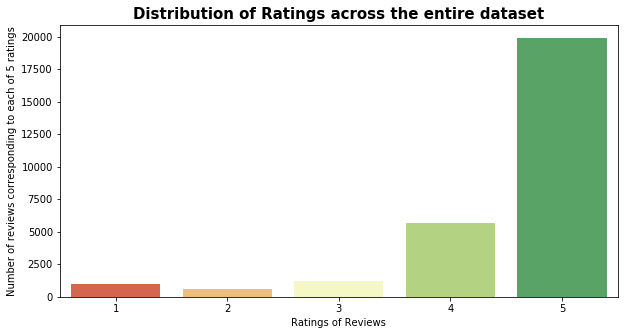

1      965
2      616
3     1206
4     5648
5    19897
Name: reviews.rating, dtype: int64


In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,5))
sns.countplot(df['reviews.rating'], palette=sns.color_palette("RdYlGn", 5))
plt.title("Distribution of Ratings across the entire dataset", fontweight='bold', fontsize=15)
plt.xlabel("Ratings of Reviews")
plt.ylabel("Number of reviews corresponding to each of 5 ratings")
plt.show();

print(df['reviews.rating'].value_counts().sort_index());

# Balanced Dataset

In [7]:
df_1 = df[df["reviews.rating"]==1]
df_2 = df[df["reviews.rating"]==2]
df_3 = df[df["reviews.rating"]==3]
df_4 = df[df["reviews.rating"]==4].sample(n=1500)
df_5=df[df["reviews.rating"]==5].sample(n=1500)

In [8]:
balanced_df = pd.concat([df_1,df_2,df_3,df_4,df_5])

In [9]:
balanced_df["reviews.rating"].value_counts()

4    1500
5    1500
3    1206
1     965
2     616
Name: reviews.rating, dtype: int64

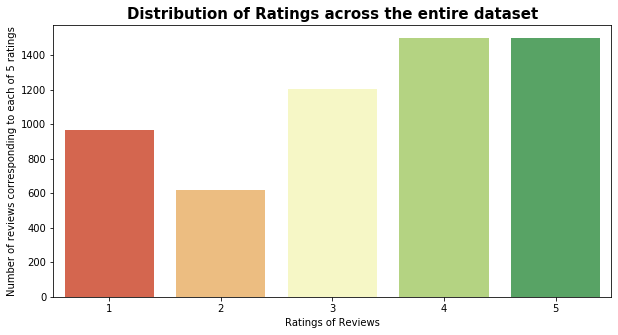

1     965
2     616
3    1206
4    1500
5    1500
Name: reviews.rating, dtype: int64


In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,5))
sns.countplot(balanced_df['reviews.rating'], palette=sns.color_palette("RdYlGn", 5))
plt.title("Distribution of Ratings across the entire dataset", fontweight='bold', fontsize=15)
plt.xlabel("Ratings of Reviews")
plt.ylabel("Number of reviews corresponding to each of 5 ratings")
plt.show();

print(balanced_df['reviews.rating'].value_counts().sort_index());

# Map Sentiment

In [11]:
sentiment = {1: 0,
            2: 0,
            3: 0,
            4: 1,
            5: 1}
balanced_df['sentiment']=balanced_df['reviews.rating'].map(sentiment)

In [12]:
balanced_df['sentiment'].value_counts()

1    3000
0    2787
Name: sentiment, dtype: int64

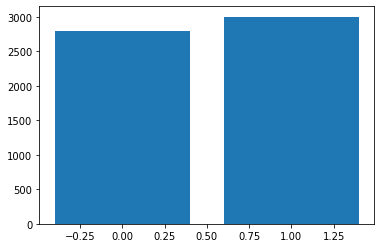

In [13]:
counts=balanced_df['sentiment'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

In [14]:
df1=balanced_df.copy()
df1.head()

,dateAdded,name,reviews.date,reviews.rating,reviews.text,sentiment
16,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2017-03-07T00:00:00.000Z,1,I don't know if I would buy thus brand again s...,0
24,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2016-05-21T00:00:00.000Z,1,These do not last long at all very cheap batte...,0
39,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2017-01-15T00:00:00.000Z,1,These batteries are horrible. We depend on AA ...,0
43,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2017-06-28T00:00:00.000Z,1,First time I bought these they worked well and...,0
45,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2016-11-23T00:00:00.000Z,1,These batteries don't last even in a simple di...,0


# Data Preprocessing

In [15]:
from sklearn.utils import shuffle
df1 = shuffle(df1)

In [16]:
df1["sentiment"].value_counts()

1    3000
0    2787
Name: sentiment, dtype: int64

In [17]:
df1.head()

,dateAdded,name,reviews.date,reviews.rating,reviews.text,sentiment
8802,2015-12-03T01:23:41Z,AmazonBasics AA Performance Alkaline Batteries...,2016-12-17T00:00:00.000Z,1,I don't know why but these things don't last l...,0
4152,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,2017-01-13T00:00:00.000Z,4,Ok.,1
22597,2016-06-08T03:50:06Z,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",2016-09-17T00:00:00.000Z,4,This is my son's 4th kindle. It is reliable bu...,1
21742,2016-06-08T03:50:06Z,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",2017-01-01T00:00:00.000Z,1,Too bad Amazon turned this tablet into a big a...,0
20555,2017-06-24T05:30:23Z,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",2017-07-22T00:00:00.000Z,5,I can not put it down. I am reading all the ti...,1


In [18]:
df1.isnull().sum()

dateAdded         0
name              0
reviews.date      0
reviews.rating    0
reviews.text      0
sentiment         0
dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787 entries, 8802 to 5694
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dateAdded       5787 non-null   object
 1   name            5787 non-null   object
 2   reviews.date    5787 non-null   object
 3   reviews.rating  5787 non-null   int64 
 4   reviews.text    5787 non-null   object
 5   sentiment       5787 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 316.5+ KB


In [20]:
df1["dateAdded"] = df1["dateAdded"].str[0:10]
df2=df1.rename(columns = {'dateAdded':'ProductLaunchDate'})
df2.head()

,ProductLaunchDate,name,reviews.date,reviews.rating,reviews.text,sentiment
8802,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2016-12-17T00:00:00.000Z,1,I don't know why but these things don't last l...,0
4152,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2017-01-13T00:00:00.000Z,4,Ok.,1
22597,2016-06-08,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",2016-09-17T00:00:00.000Z,4,This is my son's 4th kindle. It is reliable bu...,1
21742,2016-06-08,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",2017-01-01T00:00:00.000Z,1,Too bad Amazon turned this tablet into a big a...,0
20555,2017-06-24,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",2017-07-22T00:00:00.000Z,5,I can not put it down. I am reading all the ti...,1


In [21]:
df2["reviews.date"] = df2["reviews.date"].str[0:10]
df2=df2.rename(columns = {'reviews.date':'ReviewsPostedDate'})
df2.head()

,ProductLaunchDate,name,ReviewsPostedDate,reviews.rating,reviews.text,sentiment
8802,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2016-12-17,1,I don't know why but these things don't last l...,0
4152,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2017-01-13,4,Ok.,1
22597,2016-06-08,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",2016-09-17,4,This is my son's 4th kindle. It is reliable bu...,1
21742,2016-06-08,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",2017-01-01,1,Too bad Amazon turned this tablet into a big a...,0
20555,2017-06-24,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",2017-07-22,5,I can not put it down. I am reading all the ti...,1


In [22]:
#remove punctuation
def remove_punctuation(x):
    return x.translate(str.maketrans('', '', string.punctuation))

#remove words less than 4 
def remove_less_than(x):
    return ' '.join([i for i in x.split() if len(i) > 3])

#remove words with non-alphabet characters
def remove_non_alphabet(x):
    return ' '.join([i for i in x.split() if i.isalpha()])

def strip_all_entities(x):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())

In [23]:
df2['reviews.text'] = df2['reviews.text'].apply(remove_punctuation)
df2['reviews.text'] = df2['reviews.text'].apply(remove_less_than)
df2['reviews.text'] = df2['reviews.text'].apply(remove_non_alphabet)
df2['reviews.text'] = df2['reviews.text'].apply(strip_all_entities)
df2['reviews.text'].head()

8802     dont know these things dont last long Maybe do...
4152                                                      
22597    This sons kindle reliable charging plug area w...
21742    Amazon turned this tablet into advertising too...
20555    down reading time with kindle unlimited multi ...
Name: reviews.text, dtype: object

In [24]:
df2['reviews.text']

8802     dont know these things dont last long Maybe do...
4152                                                      
22597    This sons kindle reliable charging plug area w...
21742    Amazon turned this tablet into advertising too...
20555    down reading time with kindle unlimited multi ...
                               ...                        
24663    This device good entry level reader only dayli...
21586               Screen larger than phone Visual better
11375                       package open missing batteries
22596    works well worth price good quality product ha...
5694     Excellent value money nonrechargable batteries...
Name: reviews.text, Length: 5787, dtype: object

In [25]:
# from sklearn.feature_extraction.text import CountVectorizer
# import cufflinks as cf
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

# def get_top_n_words(corpus, n=None):
#     vec = CountVectorizer().fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]
# common_words = get_top_n_words(df2['reviews.text'], 20)
# for word, freq in common_words:
#     print(word, freq)
# uni_bef = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
# uni_bef.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')


In [26]:
stop_words=stopwords.words('english')
def clean_text(text):
    words=word_tokenize(text)
    # lower case text, remove stop words, punctuations, check if alphabet
    text = [word.lower() for word in words if word not in stop_words and word not in string.punctuation and word.isalpha()]    
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)
def remove_stopwords(text):
    clean_text=' '.join([word.lower() for word in text.split() if word not in stop_words])
    return clean_text

In [27]:
df2['reviews.text'] = df2['reviews.text'].apply(remove_stopwords)
df2['reviews.text'].head()

8802     dont know things dont last long maybe dont kno...
4152                                                      
22597    this sons kindle reliable charging plug area w...
21742    amazon turned tablet advertising tool many app...
20555    reading time kindle unlimited multi tasking op...
Name: reviews.text, dtype: object

# Skip stemming for now

In [28]:
# def stem_tweet(text): 
#     stemmer = PorterStemmer()
#     stemmed_sentence = []
#     for word in word_tokenize(text):
#         if len(word)>2:
#             stemmed_sentence.append(stemmer.stem(word.lower()))          
#     return " ".join(stemmed_sentence)

In [29]:
# df2['reviews.text'] = df2['reviews.text'].apply(stem_tweet)
# df2['reviews.text'].head()

In [30]:
# df2.head()

# Start again

## WordCloud

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [32]:
words = pd.Series(' '.join(df2['reviews.text']).split())

In [33]:
# import sys
# print(sys.executable)
# !pip install wordcloud

Overall

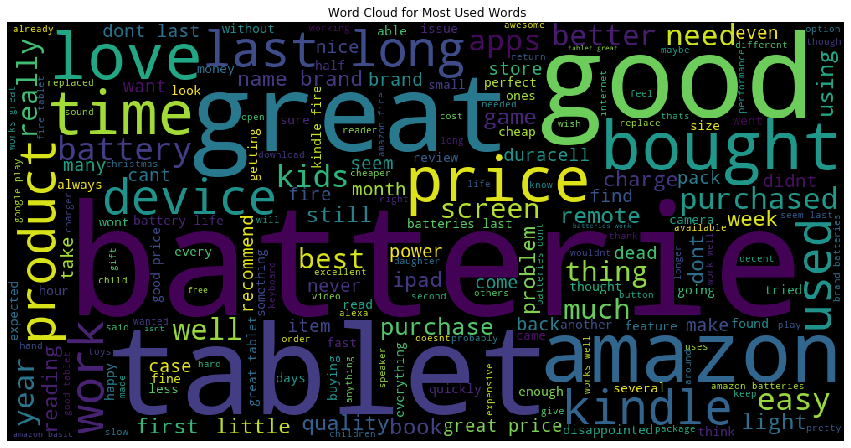

In [34]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title(" Word Cloud for Most Used Words")
plt.axis("off")
#plt.show()
plt.savefig('Amazon_Review_Word_Cloud2.jpg')

Positive Class

In [35]:
positiveWords=words = pd.Series(' '.join(df2[df2['sentiment']==1]['reviews.text']).split())

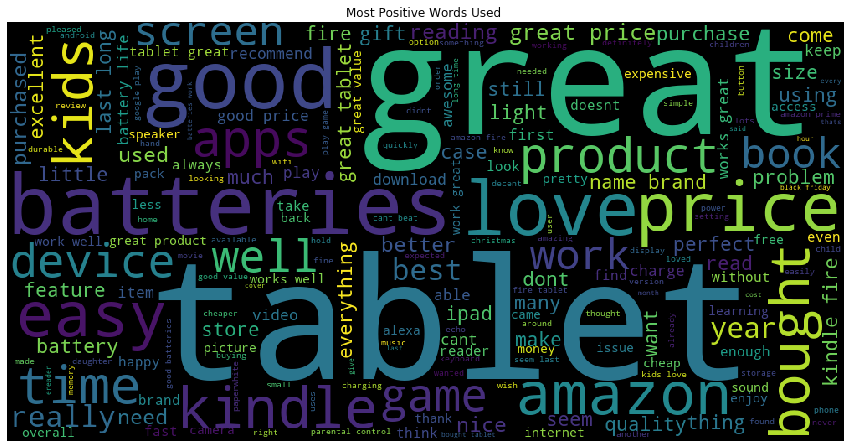

In [36]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Positive Words Used ")
plt.axis("off")
plt.show()

Negative Class

In [37]:
negativeWords=words = pd.Series(' '.join(df2[df2['sentiment']==0]['reviews.text']).split())

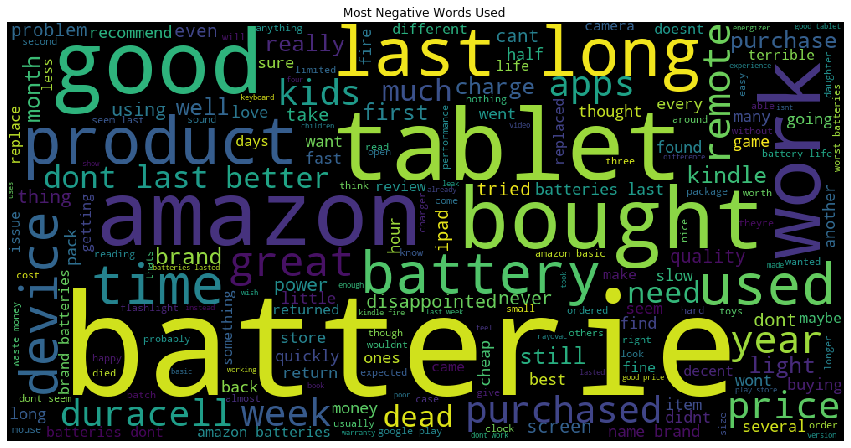

In [38]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Negative Words Used ")
plt.axis("off")
plt.show()

## Total customer reviews for each product

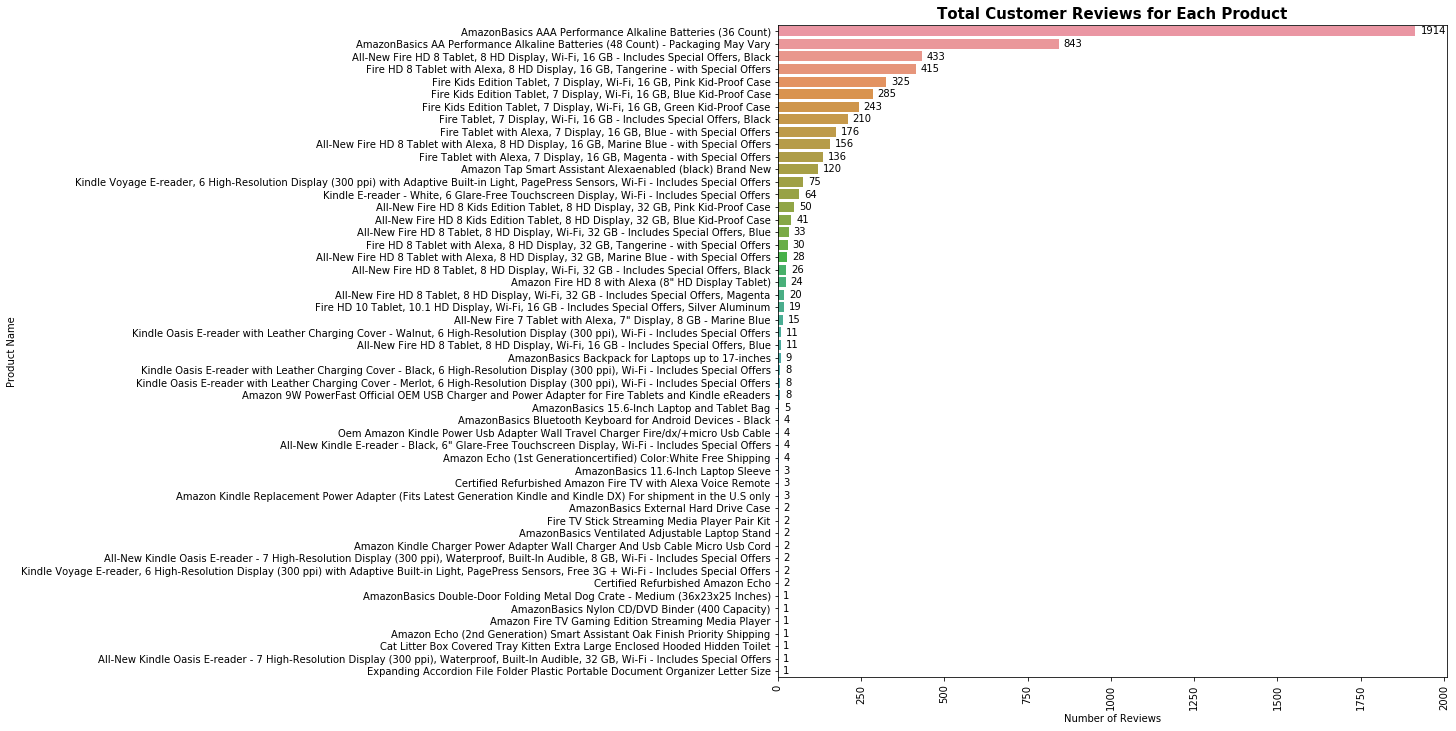

In [39]:
count_reviews=df2.groupby(['name'])['reviews.text'].count().reset_index()
count_reviews=count_reviews.rename(columns={'reviews.text': 'number_of_reviews'})
count_reviews=count_reviews.rename(columns={'name': 'product_name'})
count_reviews = count_reviews.sort_values(by="number_of_reviews",ascending=False)
plt.figure(figsize=(12,12))
plots=sns.barplot(x="number_of_reviews", y="product_name",
             data=count_reviews)
for p in plots.patches:
    plots.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.xticks(rotation='vertical')
plt.title("Total Customer Reviews for Each Product", fontweight='bold', fontsize=15)
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.show()

## Top 10 Most reviewed Amazon Products

In [40]:
top_10=count_reviews.head(10)
top_10

,product_name,number_of_reviews
24,AmazonBasics AAA Performance Alkaline Batterie...,1914
23,AmazonBasics AA Performance Alkaline Batteries...,843
5,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",433
36,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",415
40,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",325
38,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",285
39,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",243
44,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",210
42,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",176
3,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",156


## Total Customer Reviews for Each Top 10 Products Over Time

In [41]:
#Graph looks bit cluster, need to display only top 10.

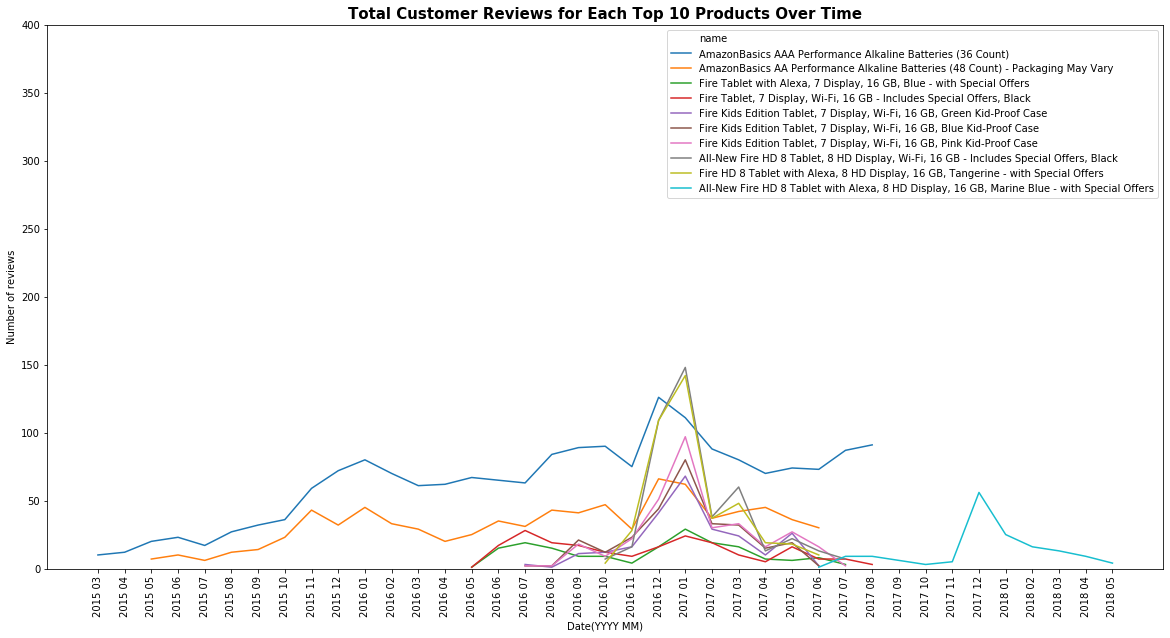

In [42]:
count_reviews_overtime=df2.groupby(['name','ReviewsPostedDate'])['reviews.text'].count().reset_index()
count_reviews_overtime['ReviewsPostedDate']= pd.to_datetime(count_reviews_overtime['ReviewsPostedDate'])
count_reviews_overtime['Month']=count_reviews_overtime['ReviewsPostedDate'].dt.strftime('%Y %m')
count_reviews_overtime_month=count_reviews_overtime.groupby(['name','Month'])['reviews.text'].sum().reset_index()

#extracting top 10 most reviewd amazon products
count_reviews_overtime_month=count_reviews_overtime_month[count_reviews_overtime_month['name'].isin(top_10['product_name'])]

count_reviews_overtime_month = count_reviews_overtime_month.sort_values(by="Month")

plt.figure(figsize=(20,10))
sns.lineplot(x="Month", y="reviews.text",
             hue="name",
             data=count_reviews_overtime_month,ci=None,style="name",dashes = False)
plt.ylim(0,400)
plt.xticks(rotation='vertical')
plt.title("Total Customer Reviews for Each Top 10 Products Over Time", fontweight='bold', fontsize=15)
plt.xlabel("Date(YYYY MM)")
plt.ylabel("Number of reviews")
plt.show()


In [43]:
# filtering only required column review.text
amazon_reviews_df=df2[['reviews.text']]

## Qn3 

In [44]:
df2.head()

,ProductLaunchDate,name,ReviewsPostedDate,reviews.rating,reviews.text,sentiment
8802,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2016-12-17,1,dont know things dont last long maybe dont kno...,0
4152,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2017-01-13,4,,1
22597,2016-06-08,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",2016-09-17,4,this sons kindle reliable charging plug area w...,1
21742,2016-06-08,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",2017-01-01,1,amazon turned tablet advertising tool many app...,0
20555,2017-06-24,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",2017-07-22,5,reading time kindle unlimited multi tasking op...,1


In [45]:
df3 = df2.copy()

In [46]:
from textblob import TextBlob
import statistics 

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df3['TextBlob_Subjectivity'] = df3['reviews.text'].apply(getSubjectivity)
df3['TextBlob_Polarity'] = df3['reviews.text'].apply(getPolarity)

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df3['TextBlob_Analysis'] = df3['TextBlob_Polarity'].apply(getAnalysis)
df3.head()
#df3[df3['name']=='Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum']

,ProductLaunchDate,name,ReviewsPostedDate,reviews.rating,reviews.text,sentiment,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
8802,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2016-12-17,1,dont know things dont last long maybe dont kno...,0,0.447619,-0.000476,Negative
4152,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2017-01-13,4,,1,0.000000,0.000000,Neutral
22597,2016-06-08,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",2016-09-17,4,this sons kindle reliable charging plug area w...,1,0.500000,0.333333,Positive
21742,2016-06-08,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",2017-01-01,1,amazon turned tablet advertising tool many app...,0,0.550000,0.600000,Positive
20555,2017-06-24,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",2017-07-22,5,reading time kindle unlimited multi tasking op...,1,0.200000,0.200000,Positive


In [47]:
pol_df=df3[df3.name.isin(top_10['product_name'])]
pol_df

,ProductLaunchDate,name,ReviewsPostedDate,reviews.rating,reviews.text,sentiment,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
8802,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2016-12-17,1,dont know things dont last long maybe dont kno...,0,0.447619,-0.000476,Negative
4152,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2017-01-13,4,,1,0.000000,0.000000,Neutral
22597,2016-06-08,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",2016-09-17,4,this sons kindle reliable charging plug area w...,1,0.500000,0.333333,Positive
21742,2016-06-08,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",2017-01-01,1,amazon turned tablet advertising tool many app...,0,0.550000,0.600000,Positive
20555,2017-06-24,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",2017-07-22,5,reading time kindle unlimited multi tasking op...,1,0.200000,0.200000,Positive
...,...,...,...,...,...,...,...,...,...
10295,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2017-06-22,4,thanks,1,0.200000,0.200000,Positive
2691,2015-10-30,AmazonBasics AAA Performance Alkaline Batterie...,2016-12-27,5,great value,1,0.750000,0.800000,Positive
11375,2015-12-03,AmazonBasics AA Performance Alkaline Batteries...,2017-02-11,1,package open missing batteries,0,0.275000,-0.100000,Negative
22596,2016-06-08,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",2016-11-26,5,works well worth price good quality product pr...,1,0.350000,0.500000,Positive


In [48]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl_pos = pol_df.loc[pol_df['TextBlob_Polarity'] == 1].sample(5).values
for c in cl_pos:
    print(c[4])

5 random reviews with the highest positive sentiment polarity: 

best
perfect group bought loves
best kindle ever used everything
checking around found best value
best thing kids they dont borrow mine anymore


In [49]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl_neu = pol_df.loc[pol_df['TextBlob_Polarity'] == 0].sample(5).values
for c in cl_neu:
    print(c[4])

5 random reviews with the most neutral sentiment(zero) polarity: 

very basic need basics look android tablet
work well lots power
this product needs would recommend others

only batterys anymore


In [50]:
print('5 reviews with the most negative polarity: \n')
# cl = df.loc[df.polarity == -0.97500000000000009, ['Review Text']].sample(2).values
cl_neg = pol_df.loc[pol_df['TextBlob_Polarity'] < 0].sample(5).values
for c in cl_neg:
    print(c[4])

5 reviews with the most negative polarity: 

seem last long others maybe little less
poor life known brand
issues long lasting
these didnt last long
batteries last week wall clock name brands last months dont waste money


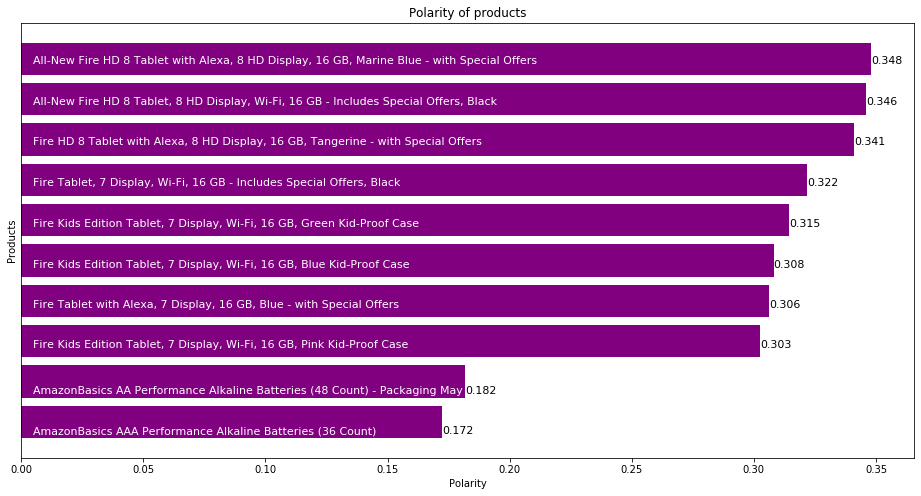

In [51]:
polarity_sorted=pd.DataFrame(pol_df.groupby('name')['TextBlob_Polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of products')
polarity_graph=plt.barh(np.arange(len(polarity_sorted.index)),polarity_sorted['TextBlob_Polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,polarity_sorted['TextBlob_Polarity']):
  plt.text(bar.get_width()+0.00001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Sentiments of each product')

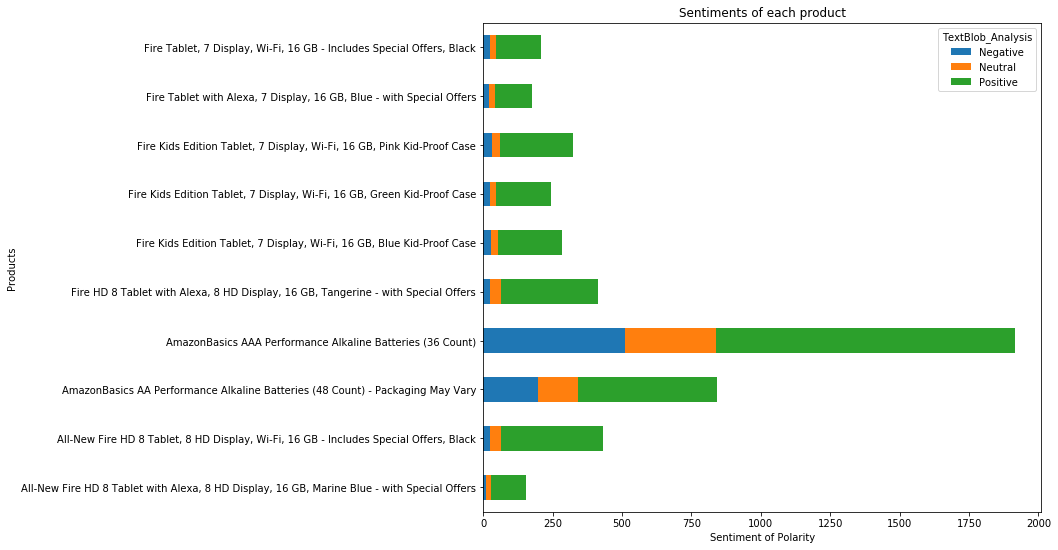

In [52]:
# Bar plot of cross tabulation between 
ct = pd.crosstab(pol_df['name'],pol_df['TextBlob_Analysis'])
ct.plot.barh(figsize=(10,9), align='center',stacked = True)
plt.xlabel('Sentiment of Polarity')
plt.ylabel('Products')
plt.title('Sentiments of each product')

In [53]:
ct

TextBlob_Analysis,Negative,Neutral,Positive
name,,,
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers",11,18,127
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",24,39,370
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary,198,143,502
AmazonBasics AAA Performance Alkaline Batteries (36 Count),510,328,1076
"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",26,38,351
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",27,26,232
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",25,21,197
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case",30,31,264
"Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers",21,21,134


# Remove

In [54]:
# from plotly.offline import init_notebook_mode, iplot
# import cufflinks as cf
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

# df4 = pd.DataFrame(pol_df)
# df4['TextBlob_Polarity'].iplot(
#     kind='hist',
#     bins=50,
#     xTitle='polarity',
#     linecolor='black',
#     yTitle='count',
#     title='Sentiment Polarity Distribution')

In [55]:
# pol_df['reviews.rating'].iplot(
#     kind='hist',
#     xTitle='rating',
#     linecolor='black',
#     yTitle='count',
#     title='Review Rating Distribution')

In [56]:
# df4.groupby('name').count()['sentiment'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', opacity=0.8,
#                                                            title='No of reviews for each product', xTitle='Class Name')

In [57]:
from datetime import datetime as DateTime, timedelta as TimeDelta
from datetime import date, timedelta
from datetime import datetime
from datetime import timedelta

In [58]:
count_reviews_overtime_new=df3.groupby(['name','ReviewsPostedDate'])['reviews.text'].count().reset_index()
count_reviews_overtime_new['ReviewsPostedDate']= pd.to_datetime(count_reviews_overtime['ReviewsPostedDate'])
count_reviews_overtime_new

,name,ReviewsPostedDate,reviews.text
0,"All-New Fire 7 Tablet with Alexa, 7"" Display, ...",2017-07-22,1
1,"All-New Fire 7 Tablet with Alexa, 7"" Display, ...",2017-08-16,1
2,"All-New Fire 7 Tablet with Alexa, 7"" Display, ...",2017-08-17,1
3,"All-New Fire 7 Tablet with Alexa, 7"" Display, ...",2017-09-22,1
4,"All-New Fire 7 Tablet with Alexa, 7"" Display, ...",2017-12-01,3
...,...,...,...
2884,"Kindle Voyage E-reader, 6 High-Resolution Disp...",2018-03-21,1
2885,Oem Amazon Kindle Power Usb Adapter Wall Trave...,2013-10-10,1
2886,Oem Amazon Kindle Power Usb Adapter Wall Trave...,2013-12-25,1
2887,Oem Amazon Kindle Power Usb Adapter Wall Trave...,2014-06-27,1


In [59]:
count_reviews=df3.groupby(['name','ProductLaunchDate'])['reviews.text'].count()
count_prodLaunchDate = pd.DataFrame(count_reviews)
print(count_prodLaunchDate)
print(len(count_prodLaunchDate))
count_reviews1=df3.groupby(['name'])['reviews.text'].count()
count_prod1 = pd.DataFrame(count_reviews1)
print(count_prod1)
print(len(count_prod1))

                                                                      reviews.text
name                                               ProductLaunchDate              
All-New Fire 7 Tablet with Alexa, 7" Display, 8... 2017-06-24                   15
All-New Fire HD 8 Kids Edition Tablet, 8 HD Dis... 2017-05-20                   41
All-New Fire HD 8 Kids Edition Tablet, 8 HD Dis... 2017-05-20                   50
All-New Fire HD 8 Tablet with Alexa, 8 HD Displ... 2017-06-24                  156
All-New Fire HD 8 Tablet with Alexa, 8 HD Displ... 2017-06-22                   28
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ... 2017-03-03                  433
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ... 2017-03-06                   11
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ... 2017-03-06                   26
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ... 2017-03-06                   33
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ... 2017-03-06                   20
All-

In [60]:
product_names_df = df3['name'].unique() #List of Unique Products
len(product_names_df)

52

In [61]:
print(product_names_df)

['AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary'
 'AmazonBasics AAA Performance Alkaline Batteries (36 Count)'
 'Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers'
 'All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers'
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case'
 'Amazon Tap Smart Assistant Alexaenabled (black) Brand New'
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case'
 'Kindle Oasis E-reader with Leather Charging Cover - Black, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers'
 'All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case'
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case'
 'Fire Tablet with Alexa, 7 Display, 16 GB, Magenta - with Special Offers'
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black'
 'All-New Fire HD 8 Tablet,

In [62]:
df3[df3['name']=='Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum']

,ProductLaunchDate,name,ReviewsPostedDate,reviews.rating,reviews.text,sentiment,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
19190,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-01-06,4,grandchild loves tablet easy child adult user ...,1,0.566667,0.266667,Positive
19200,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-02-15,4,although greatest tablets market compared appl...,1,0.550000,0.650000,Positive
19219,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-07-14,3,find easy original kindle fire like camera bet...,0,0.616667,0.352083,Positive
19222,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-02-09,4,bought tablet wife likes size reading books re...,1,0.647222,0.006944,Positive
19235,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-03-11,3,this kindle continued move screen size easy re...,0,0.770370,0.213889,Positive
19210,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-08-04,5,good product exactly wanted good price,1,0.483333,0.550000,Positive
19236,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-05-27,3,kindle fire replace laptop died pleased findin...,0,1.000000,0.650000,Positive
19183,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-05-12,4,love bigger screen think fire runs little slow...,1,0.411111,-0.047917,Negative
19173,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-06-23,3,love capabilities offerdownside totally shuts ...,0,0.675000,0.250000,Positive
19257,2016-08-01,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",2017-03-15,5,love kindle first fire kindles still kicking a...,1,0.392857,0.208929,Positive


# Average rating, polarity and reviews count of each product

In [63]:
import math
from statistics import *
reviews=[]
for i in product_names_df:
    total = count_reviews_overtime_new[count_reviews_overtime_new['name']== i]
    total_new = df3[df3['name']== i]

    # To get first review date
    first_day_review =total['ReviewsPostedDate'].min()
    #To get last review date
    last_day_review =total['ReviewsPostedDate'].max()
    
# ******************
#For Product Launch Date

#     Begindatestring = first_day_review
#     Begindate = datetime.strptime(Begindatestring, "%Y-%m-%d")
#     #To get 90th day date
#     day90 = Begindate + timedelta(days=90)
    
#     last_date = last_day_review
#     last_day = datetime.strptime(last_date, "%Y-%m-%d")
#     EndDate = last_day+timedelta(days=1)
    
#         # to datetime object
#     Begindate = Begindate.strftime("%Y-%m-%d")
#     day90 = day90.strftime("%Y-%m-%d")
#     enddate = EndDate.strftime("%Y-%m-%d")

#***********************
    
    
    Begindate = first_day_review
    #To get 90th day date
    day90 = Begindate + timedelta(days=90)
    
    last_day_review = last_day_review+timedelta(days=1)
    
    # to datetime object
    Begindate = Begindate.strftime("%Y-%m-%d")
    day90 = day90.strftime("%Y-%m-%d")
    enddate = last_day_review.strftime("%Y-%m-%d")
    
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity
    

   
    reviews_dates_within_90_days = []
    reviews_dates_within_90_days = total[total['ReviewsPostedDate'].between(Begindate,day90, inclusive=True)]

    reviews_dates_after_90_days = []
    reviews_dates_after_90_days = total[total['ReviewsPostedDate'].between(day90,enddate, inclusive=False)]
    
    ratings_dates_within_90_days = []
    ratings_dates_within_90_days = total_new[total_new['ReviewsPostedDate'].between(Begindate,day90, inclusive=True)]

    ratings_dates_after_90_days = []
    ratings_dates_after_90_days = total_new[total_new['ReviewsPostedDate'].between(day90,enddate, inclusive=False)]

    reviews_first_90_days = reviews_dates_within_90_days['reviews.text'].sum()
    reviews_later_days =  reviews_dates_after_90_days['reviews.text'].sum()
    
    avg_rating_first_90_days = ratings_dates_within_90_days['reviews.rating'].mean()
    avg_rating_later_days =  ratings_dates_after_90_days['reviews.rating'].mean()
    
    avg_rating_first_90_days = round(avg_rating_first_90_days,1)
    avg_rating_later_days = round(avg_rating_later_days,1)
    
    ratings_dates_within_90_days['TextBlob_Polarity_before90'] = ratings_dates_within_90_days['reviews.text'].apply(getPolarity)
    ratings_dates_after_90_days['TextBlob_Polarity_after90'] = ratings_dates_after_90_days['reviews.text'].apply(getPolarity)
    
    Avgpolatirybefore90 = ratings_dates_within_90_days['TextBlob_Polarity_before90'].mean()
    Avgpolarityafter90 = ratings_dates_after_90_days['TextBlob_Polarity_after90'].mean()

    
    reviews.append([i,reviews_first_90_days,reviews_later_days,avg_rating_first_90_days,avg_rating_later_days,Avgpolatirybefore90,Avgpolarityafter90])


reviews_df = pd.DataFrame(reviews, columns=["Product_Name", "reviews_first_90_days","reviews_later_days","avg_rating_first_90_days","avg_rating_later_days","Avg_polarity_before90","Avg_polarity_after90"])
reviews_df

,Product_Name,reviews_first_90_days,reviews_later_days,avg_rating_first_90_days,avg_rating_later_days,Avg_polarity_before90,Avg_polarity_after90
0,AmazonBasics AA Performance Alkaline Batteries...,26,817,3.8,2.9,0.250379,0.179638
1,AmazonBasics AAA Performance Alkaline Batterie...,49,1865,3.4,2.9,0.197874,0.171750
2,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",50,126,3.3,3.7,0.280988,0.316201
3,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",24,132,3.8,3.8,0.270048,0.362360
4,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",18,307,3.2,3.6,0.180184,0.309724
5,Amazon Tap Smart Assistant Alexaenabled (black...,14,106,3.6,3.6,0.312271,0.367382
6,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",27,258,3.4,3.6,0.258526,0.313238
7,Kindle Oasis E-reader with Leather Charging Co...,3,5,4.3,3.6,0.387222,0.259206
8,"All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...",8,33,3.2,3.6,0.439299,0.263526
9,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",15,228,3.4,3.6,0.207930,0.321539


In [64]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'  

reviews_df['TextBlob_Analysis_before90'] = reviews_df['Avg_polarity_before90'].apply(getAnalysis)
reviews_df['TextBlob_Analysis_after90'] = reviews_df['Avg_polarity_after90'].apply(getAnalysis)
reviews_df.head()
reviews_df

,Product_Name,reviews_first_90_days,reviews_later_days,avg_rating_first_90_days,avg_rating_later_days,Avg_polarity_before90,Avg_polarity_after90,TextBlob_Analysis_before90,TextBlob_Analysis_after90
0,AmazonBasics AA Performance Alkaline Batteries...,26,817,3.8,2.9,0.250379,0.179638,Positive,Positive
1,AmazonBasics AAA Performance Alkaline Batterie...,49,1865,3.4,2.9,0.197874,0.171750,Positive,Positive
2,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",50,126,3.3,3.7,0.280988,0.316201,Positive,Positive
3,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",24,132,3.8,3.8,0.270048,0.362360,Positive,Positive
4,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",18,307,3.2,3.6,0.180184,0.309724,Positive,Positive
5,Amazon Tap Smart Assistant Alexaenabled (black...,14,106,3.6,3.6,0.312271,0.367382,Positive,Positive
6,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",27,258,3.4,3.6,0.258526,0.313238,Positive,Positive
7,Kindle Oasis E-reader with Leather Charging Co...,3,5,4.3,3.6,0.387222,0.259206,Positive,Positive
8,"All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...",8,33,3.2,3.6,0.439299,0.263526,Positive,Positive
9,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",15,228,3.4,3.6,0.207930,0.321539,Positive,Positive


In [65]:
Vis_df = reviews_df.copy()
Total_reviews = Vis_df["reviews_first_90_days"] + reviews_df["reviews_later_days"]
Vis_df["Total_Reviews"] = Total_reviews
print(Vis_df)

                                         Product_Name  reviews_first_90_days  \
0   AmazonBasics AA Performance Alkaline Batteries...                     26   
1   AmazonBasics AAA Performance Alkaline Batterie...                     49   
2   Fire Tablet with Alexa, 7 Display, 16 GB, Blue...                     50   
3   All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...                     24   
4   Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...                     18   
5   Amazon Tap Smart Assistant Alexaenabled (black...                     14   
6   Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...                     27   
7   Kindle Oasis E-reader with Leather Charging Co...                      3   
8   All-New Fire HD 8 Kids Edition Tablet, 8 HD Di...                      8   
9   Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...                     15   
10  Fire Tablet with Alexa, 7 Display, 16 GB, Mage...                     35   
11  All-New Fire HD 8 Tablet, 8 HD Displ

In [66]:
AvgFinalVis_df=Vis_df[Vis_df.Product_Name.isin(top_10['product_name'])]
AvgFinalVis_df

,Product_Name,reviews_first_90_days,reviews_later_days,avg_rating_first_90_days,avg_rating_later_days,Avg_polarity_before90,Avg_polarity_after90,TextBlob_Analysis_before90,TextBlob_Analysis_after90,Total_Reviews
0,AmazonBasics AA Performance Alkaline Batteries...,26,817,3.8,2.9,0.250379,0.179638,Positive,Positive,843
1,AmazonBasics AAA Performance Alkaline Batterie...,49,1865,3.4,2.9,0.197874,0.171750,Positive,Positive,1914
2,"Fire Tablet with Alexa, 7 Display, 16 GB, Blue...",50,126,3.3,3.7,0.280988,0.316201,Positive,Positive,176
3,"All-New Fire HD 8 Tablet with Alexa, 8 HD Disp...",24,132,3.8,3.8,0.270048,0.362360,Positive,Positive,156
4,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",18,307,3.2,3.6,0.180184,0.309724,Positive,Positive,325
6,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",27,258,3.4,3.6,0.258526,0.313238,Positive,Positive,285
9,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",15,228,3.4,3.6,0.207930,0.321539,Positive,Positive,243
11,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",203,230,3.8,3.9,0.342912,0.348843,Positive,Positive,433
14,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",178,237,3.9,3.8,0.326952,0.351898,Positive,Positive,415
19,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",60,150,3.6,3.6,0.255865,0.348387,Positive,Positive,210


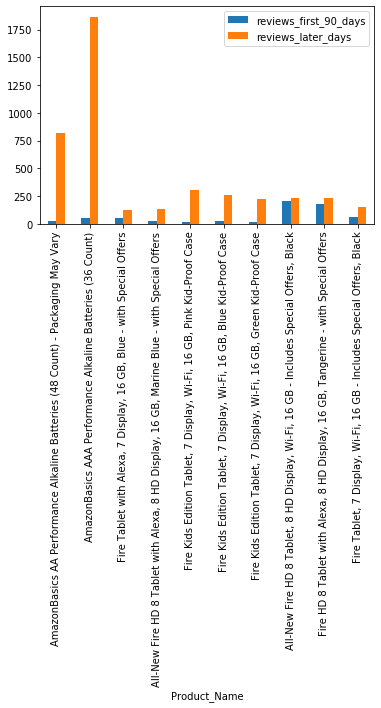

In [67]:
AvgFinalVis_df.plot(x="Product_Name", y=["reviews_first_90_days", "reviews_later_days"], kind="bar")

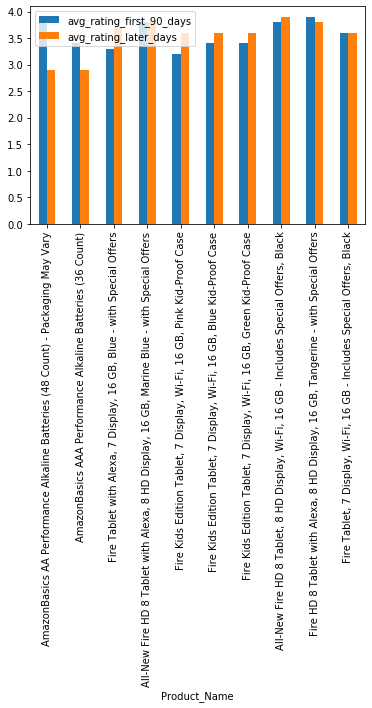

In [68]:
AvgFinalVis_df.plot(x="Product_Name", y=["avg_rating_first_90_days", "avg_rating_later_days"], kind="bar")

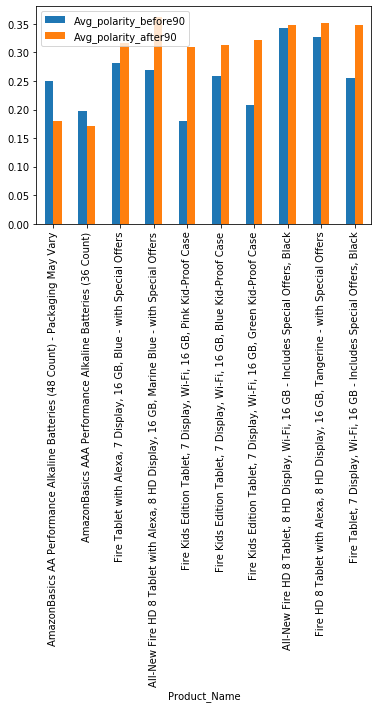

In [69]:
AvgFinalVis_df.plot(x="Product_Name", y=["Avg_polarity_before90", "Avg_polarity_after90"], kind="bar")

# Q2 - Topic Modelling

In [157]:
import nltk
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

def clean(doc,most_common):
    lowercase = [i.lower() for i in nltk.word_tokenize(doc) if i.lower()
                not in most_common]
    normalized=[stemmer.stem(i) for i in lowercase]
    return normalized

In [158]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [159]:
import math
import nltk
from gensim import corpora
import gensim
from statistics import *
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

def dominant_topic(ProductName):
    print(ProductName+"\n")
    total = df2[df2['name']== ProductName]
    review_df = total['reviews.text']
    
    reviews_list = review_df.values.tolist()

    filtered_sample=[]
    for each_review in review_df:
        words=word_tokenize(each_review)
        for w in words:
            filtered_sample.append(w)
    fdist=nltk.FreqDist(filtered_sample)
    most_common=[i for i,j in fdist.most_common(10)]
    reviews_clean = [clean(i,most_common) for i in reviews_list]
    dictionary = corpora.Dictionary(reviews_clean)
    for each_word in dictionary:
        dictonary_words = each_word,dictionary[each_word]
    
    doc_term_matrix = [dictionary.doc2bow(reviews_list) for reviews_list in reviews_clean]
    
    Lda = gensim.models.ldamodel.LdaModel

    # Running and Training LDA model on the document term matrix.
    ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary)
    
    for i,topic in ldamodel.show_topics(formatted=True, num_topics=5, num_words=10):
        print(str(i)+": "+ topic)
        #print()
    
    topics = [ldamodel[doc_term_matrix[i]] for i in range(len(reviews_list))]
    
    document_topic = \
    pd.concat([topics_document_to_dataframe(topics_document, num_topics=5) for topics_document in topics]) \
      .reset_index(drop=True).fillna(0)
    
    sns.set(rc={'figure.figsize':(10,5)})
    plt.xlabel("List of Topics")
    plt.ylabel("Total Reviews for product")
    plt.suptitle("Topics Distribution for Product.")
    document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')   
    return ldamodel

In [160]:
#document_topic

# Dominant topic for top 3 products

In [161]:
top_3 = top_10.head(3).reset_index()
top_3_names = top_3['product_name']
top_3_names

0    AmazonBasics AAA Performance Alkaline Batterie...
1    AmazonBasics AA Performance Alkaline Batteries...
2    All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...
Name: product_name, dtype: object

In [173]:
#dominant_topic(top_3_names[0])

In [174]:
#dominant_topic(top_3_names[1])

In [175]:
#dominant_topic(top_3_names[2])

In [184]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

def word_cloud_topic(ProductName):
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

    topics = v.show_topics(formatted=False)

    fig, axes = plt.subplots(1, 5, figsize=(10,5), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.suptitle("Word Cloud of Topic Distribution for each Product.")
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.savefig('Topic_Modelling_Word_Cloud.jpg')
    plt.show()

AmazonBasics AAA Performance Alkaline Batteries (36 Count)

0: 0.025*"brand" + 0.019*"time" + 0.017*"these" + 0.015*"use" + 0.011*"product" + 0.011*"name" + 0.011*"they" + 0.010*"last" + 0.010*"week" + 0.009*"packag"
1: 0.016*"seem" + 0.016*"last" + 0.016*"they" + 0.016*"use" + 0.014*"these" + 0.013*"well" + 0.010*"like" + 0.010*"work" + 0.009*"duracel" + 0.009*"pack"
2: 0.027*"brand" + 0.017*"name" + 0.012*"use" + 0.012*"remot" + 0.012*"life" + 0.010*"purchas" + 0.009*"well" + 0.009*"order" + 0.008*"valu" + 0.007*"money"
3: 0.016*"work" + 0.015*"these" + 0.015*"remot" + 0.014*"they" + 0.012*"purchas" + 0.011*"use" + 0.009*"charg" + 0.008*"product" + 0.008*"day" + 0.008*"expect"
4: 0.019*"duracel" + 0.016*"they" + 0.014*"brand" + 0.012*"time" + 0.012*"like" + 0.012*"use" + 0.010*"energ" + 0.009*"these" + 0.009*"month" + 0.009*"seem"


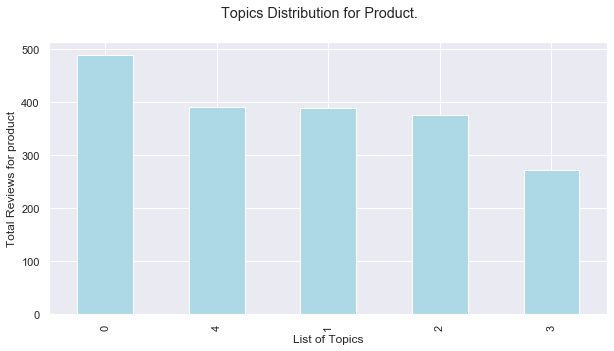

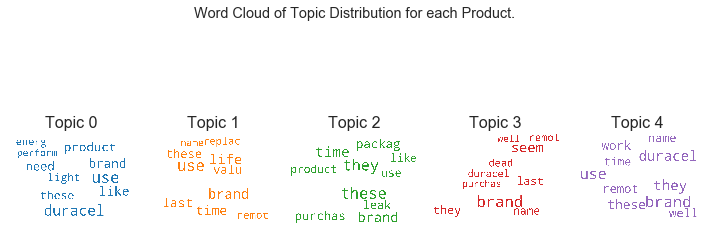

In [185]:
#Print Word Cloud for each Product - Topics.

Product1 = word_cloud_topic(dominant_topic(top_3_names[0]))

AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary

0: 0.029*"work" + 0.018*"duracel" + 0.015*"use" + 0.013*"well" + 0.012*"light" + 0.011*"they" + 0.010*"brand" + 0.010*"purchas" + 0.009*"week" + 0.009*"order"
1: 0.022*"brand" + 0.016*"work" + 0.014*"seem" + 0.012*"like" + 0.010*"week" + 0.009*"they" + 0.009*"name" + 0.008*"last" + 0.007*"realli" + 0.007*"need"
2: 0.013*"brand" + 0.012*"time" + 0.012*"like" + 0.010*"would" + 0.010*"remot" + 0.010*"quickli" + 0.009*"name" + 0.009*"need" + 0.009*"last" + 0.008*"day"
3: 0.019*"brand" + 0.018*"use" + 0.012*"purchas" + 0.011*"duracel" + 0.010*"last" + 0.010*"energ" + 0.010*"product" + 0.009*"seem" + 0.009*"qualiti" + 0.009*"they"
4: 0.035*"work" + 0.014*"they" + 0.011*"time" + 0.009*"devic" + 0.009*"duracel" + 0.009*"remot" + 0.008*"camera" + 0.007*"product" + 0.007*"bought" + 0.006*"didnt"


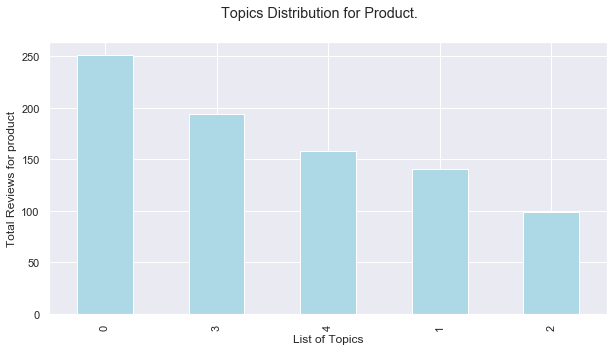

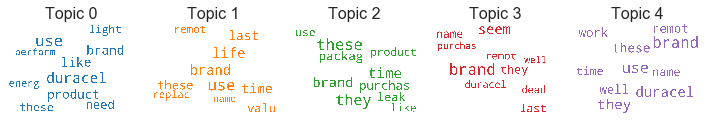

In [179]:
#Print Word Cloud for each Product - Topics.

Product2 = word_cloud_topic(dominant_topic(top_3_names[1]))

All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black

0: 0.015*"read" + 0.014*"like" + 0.014*"play" + 0.012*"book" + 0.011*"game" + 0.011*"screen" + 0.010*"easi" + 0.009*"work" + 0.009*"look" + 0.009*"would"
1: 0.013*"devic" + 0.012*"love" + 0.011*"want" + 0.011*"screen" + 0.010*"read" + 0.009*"time" + 0.009*"use" + 0.009*"product" + 0.009*"ipad" + 0.008*"work"
2: 0.011*"love" + 0.010*"easi" + 0.008*"game" + 0.008*"nice" + 0.008*"like" + 0.007*"time" + 0.007*"would" + 0.007*"back" + 0.007*"avail" + 0.007*"tablet"
3: 0.019*"work" + 0.012*"would" + 0.010*"ipad" + 0.010*"recommend" + 0.010*"use" + 0.008*"need" + 0.008*"easi" + 0.008*"read" + 0.008*"like" + 0.007*"purchas"
4: 0.014*"like" + 0.012*"work" + 0.010*"love" + 0.010*"ipad" + 0.009*"would" + 0.009*"screen" + 0.008*"game" + 0.008*"purchas" + 0.008*"kid" + 0.008*"happi"


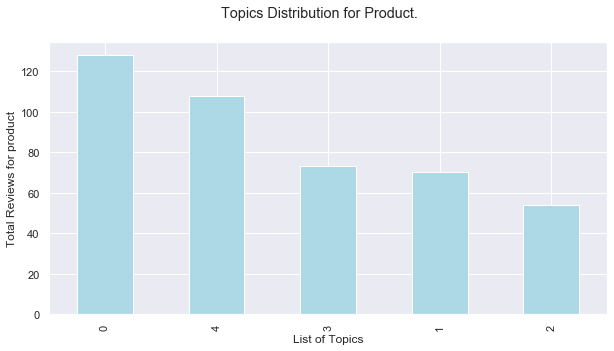

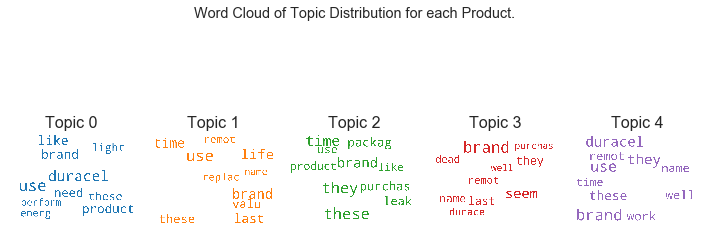

In [186]:
#Print Word Cloud for each Product - Topics.
wc_3 = dominant_topic(top_3_names[2])
Product3 = word_cloud_topic(wc_3)